In [5]:
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
train_data = pd.read_csv('train.csv')

In [7]:
test_data = pd.read_csv('test.csv')

In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
cols = ['Name','Ticket','PassengerId']
train_data.drop(cols,axis = 1,inplace = True)
test_data.drop(cols,axis = 1,inplace = True)

In [10]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
train_data['Embarked'].unique()
label_map = { k:i  for i,k in enumerate(train_data['Embarked'].unique()) }

In [12]:
train_data['Embarked'] = train_data['Embarked'].map(label_map)

In [13]:
test_data['Embarked'] = test_data['Embarked'].map(label_map)

In [14]:
train_data['Sex'] = np.where(train_data['Sex'] == 'male' ,0,1)
test_data['Sex'] = np.where(test_data['Sex'] == 'male' ,0,1) 

1. Encode Cabin column 
2. fillna for age 
3. fillna for fare (test)


In [15]:
label = {k:i for i,k in enumerate(train_data['Cabin'].unique())}
train_data['Cabin'] = train_data['Cabin'].map(label)
test_data['Cabin'] = test_data['Cabin'].map(label)

In [16]:
test_data['Cabin'].fillna(value=0,inplace = True)

In [17]:
train_data['Age'].fillna(value=train_data['Age'].mean(),inplace = True)
test_data['Age'].fillna(value=test_data['Age'].mean(),inplace = True)

In [18]:
train_data['Fare'].fillna(value=train_data['Fare'].mean(),inplace = True)
test_data['Fare'].fillna(value=test_data['Fare'].mean(),inplace = True)

In [19]:
from sklearn.feature_selection import chi2

In [20]:
p = chi2(train_data['Embarked'].to_numpy().reshape(-1,1),train_data['Survived'].to_numpy().reshape(-1,1))[1]
kbest = {'Embarked' : p[0]}
p = chi2(train_data['Pclass'].to_numpy().reshape(-1,1),train_data['Survived'].to_numpy().reshape(-1,1))[1]
kbest['Pclass'] = p[0]
p = chi2(train_data['Sex'].to_numpy().reshape(-1,1),train_data['Survived'].to_numpy().reshape(-1,1))[1]
kbest['Sex']=  p[0]
p = chi2(train_data['Cabin'].to_numpy().reshape(-1,1),train_data['Survived'].to_numpy().reshape(-1,1))[1]
kbest['Cabin']=  p[0]

In [21]:
kbest

{'Embarked': 0.0001711228156936033,
 'Pclass': 2.7537856320284722e-08,
 'Sex': 6.210584899769243e-39,
 'Cabin': 0.0}

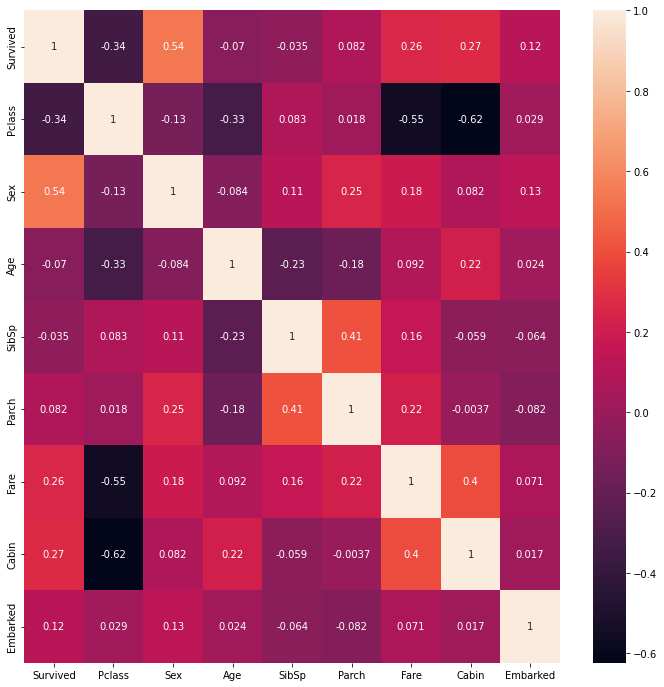

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

In [23]:
# high correlation between cabin and pclass droping cabin 
train_data.drop('Cabin',axis = 1,inplace = True)
test_data.drop('Cabin',axis = 1,inplace = True)

In [24]:
y = train_data['Survived'].to_numpy()
coli = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = train_data[coli].to_numpy()

In [25]:
mu = np.mean(x,axis = 0)
sd = np.std(x,axis = 0)
x_ = (x-mu)/sd

In [26]:
from keras import models
from keras.layers import Dense

In [35]:
model = models.Sequential()
model.add(Dense(7,'relu',input_shape=(7,)))

model.add(Dense(1,'sigmoid'))

In [36]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
hist = model.fit(x_,y,epochs = 20, batch_size = 20)

Epoch 1/20
45/45 [==============================] - 0s 1ms/step - loss: 0.6454 - accuracy: 0.6745
Epoch 2/20
45/45 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.7071
Epoch 3/20
45/45 [==============================] - 0s 2ms/step - loss: 0.5681 - accuracy: 0.7419
Epoch 4/20
45/45 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.7542
Epoch 5/20
45/45 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.7576
Epoch 6/20
45/45 [==============================] - 0s 1ms/step - loss: 0.5015 - accuracy: 0.7699
Epoch 7/20
45/45 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.7991
Epoch 8/20
45/45 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.8013
Epoch 9/20
45/45 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.8036
Epoch 10/20
45/45 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.8070
Epoch 11/20
45/45 [

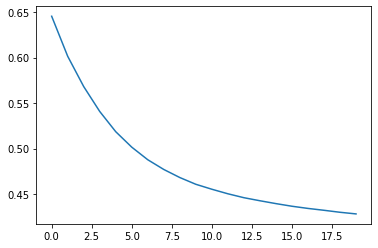

In [38]:
plt.plot(hist.history['loss'])
plt.show()

In [39]:
model.evaluate(x_,y)[1]

28/28 [==============================] - 0s 888us/step - loss: 0.4266 - accuracy: 0.8193


0.8193041682243347

In [40]:
#y_test = test_data['Survived']
y_test = pd.read_csv('ytest.csv').drop('PassengerId',axis = 1).to_numpy().flatten()
xt = test_data[coli].to_numpy()
x_test = (xt-mu)/sd

In [41]:
model.evaluate(x_test,y_test)[1]

14/14 [==============================] - 0s 2ms/step - loss: 0.2903 - accuracy: 0.9354


0.9354066848754883

In [42]:
# with ANN got an accuracy of about 80-85 on training set and 90-95 on test set 

In [43]:
# Trying a simple logistic regression on the dataset 

In [44]:
def sigmoid(x):
    an = 1/(1+np.exp(-x))
    return an

class LogisticRegression:
    def __init__(self,n_feature,x):
        np.random.seed(43)
        self.w = np.random.randn(n_feature+1,1)
        self.m = x.shape[0]
        self.x_ = np.concatenate([np.ones((self.m,1)),x],axis = 1)
    def forward(self):
        y_ = sigmoid(np.dot(self.x_,self.w))
        return y_
    def train(self,x,y,learn_rate):
        y = y.reshape(-1,1)
        yp = self.forward()
        ls = (-y.T.dot(np.log(yp)) - ((1-y).T.dot(np.log(1-yp))))/self.m
        grad = self.x_.T.dot((yp - y))/self.m
        self.w = self.w - learn_rate*grad
        return ls
    def pred(self,x):
        m = x.shape[0]
        xt = np.concatenate([np.ones((m,1)),x],axis = 1)
        y_pred = sigmoid(np.dot(xt,self.w))
        return y_pred

In [45]:
obj = LogisticRegression(n_feature=7,x=x_)

In [46]:
from tqdm import tqdm

def train_red(obj,x_,y,learn,epochs):
    los_log = []
    for i in tqdm(range(epochs)):
        ls = obj.train(x_,y,learn)[0][0]
        los_log.append(ls)
    plt.plot(los_log)
    plt.show()
    return los_log

100%|█████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 22339.83it/s]


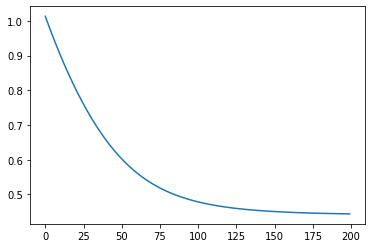

In [47]:
log = train_red(obj,x_,y,0.1,200)

In [48]:
def accu(x,y):
    pred = obj.pred(x)
    pred = (pred.flatten()>=0.5)
    ac = np.sum( (pred==y)  )/len(y)
    print('The accuracy on this set is: ',ac)

In [49]:
accu(x_,y)  #Training Set Performance 

The accuracy on this set is:  0.8002244668911336


In [50]:
accu(x_test,y_test)    #Test Set performance 

The accuracy on this set is:  0.9330143540669856


In [51]:
#this is prety much same as NN preformace 

Now trying Decision Tree clssifier 
for the first time

In [52]:
def entropy (column):
    pall = np.unique(column,return_counts=True)[1]
    N = float(column.shape[0])
    entr = 0.0
    for ix in pall:
        prob = ix/N
        entr += -prob*np.log2(prob)
    return entr
        

In [53]:
def divide_data(data,col,fval):
    left = pd.DataFrame(columns=data.columns)
    right =  pd.DataFrame(columns=data.columns)
    for i in range(data.shape[0]):
        val = data[col].loc[i]
        if val > fval:
            right = right.append(data.loc[i])
        else:
            left = left.append(data.loc[i])
    return right,left

In [54]:
def Information_gain(data,ix,target_col):
    right_data,left_data = divide_data(data,ix,data[ix].mean())
    nr = float(right_data.shape[0]/data.shape[0])
    nl = float(left_data.shape[0]/data.shape[0])
    if nr == 0 or nl == 0:
        return -1e4
    ig = entropy(data[target_col].values) - (nr*entropy(right_data[target_col].values) + nl*entropy(left_data[target_col].values))
    return ig
        

In [55]:
cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [56]:
Information_gain(train_data,'Sex','Survived')

0.2176601066606142

In [57]:
label = {}
target_col = 'Survived'
for ix in cols:
    label[ix] = Information_gain(train_data,ix,target_col)
label

{'Pclass': 0.07579362743608165,
 'Sex': 0.2176601066606142,
 'Age': 0.0008836151229467681,
 'SibSp': 0.009584541813400071,
 'Parch': 0.015380754493137694,
 'Fare': 0.042140692838995464,
 'Embarked': 0.01720377994142208}

In [58]:
entropy(train_data['Survived'].values)

0.9607079018756469

In [59]:
class DecisionTree:
    def __init__(self,depth = 0, max_depth = 6):
        self.left = None
        self.right = None
        self.depth = depth
        self.max_depth = max_depth
        self.target = None
        self.fkey = None
        self.fval = None
    def train(self,x):
        cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
        info_gain = []
        for ix in cols:
            ig = Information_gain(x,ix,target_col)
            info_gain.append(ig)
        self.fkey = cols[np.argmax(info_gain)]
        self.fval = x[self.fkey].mean()
#         print('Current key is: {} and depth is: {} '.format(self.fkey,self.depth) )
        x_right,x_left = divide_data(x,self.fkey,self.fval)
        
        x_right = x_right.reset_index(drop=True)
        x_left = x_left.reset_index(drop=True)
        
        if x_right.shape[0] == 0 or x_left.shape[0] == 0:
            if x[target_col].mean() > 0.5:
                self.target = 'Survive'
            else:
                self.target = 'Dead'
            return 
        
        if self.depth >= self.max_depth:
            if x[target_col].mean() > 0.5:
                self.target = 'Survive'
            else:
                self.target = 'Dead'
            return 
        
        self.right = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(x_right)
        
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(x_left)
        
        if x[target_col].mean() > 0.5:
            self.target = 'Survive'
        else:
            self.target = 'Dead'
    
    def predict(self,test):
        if test[self.fkey] > self.fval:
            if self.right is None:
                return self.target
            else:
                return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            else:
                return self.left.predict(test)
            
        
            
        
        

In [60]:
dt = DecisionTree(max_depth=7)

In [61]:
dt.train(train_data)

In [62]:
ypred = []
for ix in range(train_data.shape[0]):
    pid = dt.predict(train_data.loc[ix])
    ypred.append(pid)

ypred = np.array(ypred)
ypred = np.where(ypred == 'Dead',0,1)
y_train = train_data[target_col].values
acc = np.sum(ypred == y_train)/len(y_train)

print('Accuracy on train set ',acc)

Accuracy on train set  0.8787878787878788


In [63]:
ypred = []
for ix in range(test_data.shape[0]):
    pid = dt.predict(test_data.loc[ix])
    ypred.append(pid)
ypred = np.array(ypred)
ypred = np.where(ypred == 'Dead',0,1)
acc = np.sum(ypred == y_test)/len(y_test)
print('Accuracy on Test data: ',acc)

Accuracy on Test data:  0.854066985645933


In [64]:
# Neural Network performs better on test set i e it generalizes better

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dec = DecisionTreeClassifier(criterion='entropy',max_depth=8,min_impurity_decrease=0.01)
dec.fit(train_data[cols],train_data[target_col])

DecisionTreeClassifier(criterion='entropy', max_depth=8,
                       min_impurity_decrease=0.01)

In [67]:
dec.score(train_data[cols],train_data[target_col])  #accu on training set 

0.8305274971941639

In [68]:
dec.score(test_data[cols],y_test)                  #accu on test set 

0.9545454545454546

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier(n_estimators=15,criterion = 'entropy',max_depth=5)

In [79]:
rf.fit(train_data[cols],train_data[target_col])

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=15)

In [80]:
print ( rf.score(train_data[cols],train_data[target_col]) ) 
print( rf.score(test_data[cols],y_test) )

0.8383838383838383
0.9043062200956937


In [81]:
#implimenting with CV set 

In [180]:
from sklearn.utils import shuffle
train_data = shuffle(train_data).reset_index(drop = True)

In [181]:
split = int (train_data.shape[0]*0.7)
x_train = train_data[:split]
x_cv = train_data[split:]
x_cv = x_test.reset_index(drop = True)

In [182]:
x_train_nor = x_train[cols].to_numpy()
y_train = x_train[target_col].values

mu = np.mean(x_train_nor,axis = 0)
sd = np.std(x_train_nor,axis = 0)
x_train_nor = (x_train_nor-mu)/sd

xcv = x_cv[cols].to_numpy()
ycv = x_cv[target_col].values

# mu = np.mean(xcv,axis = 0)
# sd = np.std(xcv,axis = 0)
xcv = (xcv-mu)/sd

In [197]:
mdl = models.Sequential()
mdl.add(Dense(7,'relu',input_shape=(7,)))
mdl.add(Dense(1,'sigmoid'))
mdl.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [198]:
hst = mdl.fit(x_train_nor,y_train,epochs = 30, batch_size = 5, validation_data=(xcv,ycv))

Epoch 1/30
125/125 [==============================] - 1s 2ms/step - loss: 0.6842 - accuracy: 0.6453 - val_loss: 0.6522 - val_accuracy: 0.6119
Epoch 2/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6024 - accuracy: 0.6902 - val_loss: 0.5904 - val_accuracy: 0.6940
Epoch 3/30
125/125 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.7528 - val_loss: 0.5535 - val_accuracy: 0.7388
Epoch 4/30
125/125 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.7721 - val_loss: 0.5266 - val_accuracy: 0.7463
Epoch 5/30
125/125 [==============================] - 0s 2ms/step - loss: 0.4950 - accuracy: 0.7897 - val_loss: 0.5068 - val_accuracy: 0.7761
Epoch 6/30
125/125 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.7994 - val_loss: 0.4916 - val_accuracy: 0.7873
Epoch 7/30
125/125 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.8138 - val_loss: 0.4827 - val_accuracy: 0.7985
Epoch 

In [199]:
mdl.evaluate(x_train_nor,y_train)[1]

20/20 [==============================] - 0s 1ms/step - loss: 0.3902 - accuracy: 0.8363


0.8362760543823242

In [200]:
mdl.evaluate(xcv,ycv)[1]

9/9 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8321


0.8320895433425903

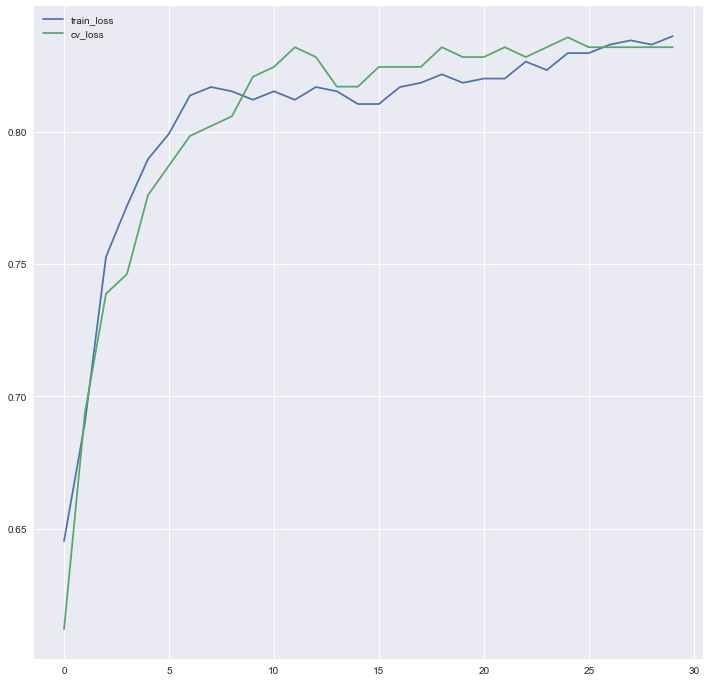

In [201]:
log = hst.history
plt.figure(figsize=(12,12))
plt.style.use('seaborn')
plt.plot(log['accuracy'],label = 'train_loss')
plt.plot(log['val_accuracy'], label = 'cv_loss')
plt.legend()
plt.show()

In [202]:
xt = (xt-mu)/sd

In [203]:
mdl.evaluate(xt,y_test)

14/14 [==============================] - 0s 1ms/step - loss: 7.1567e-10 - accuracy: 1.0000


[7.156731873791955e-10, 1.0]

In [206]:
yre = mdl.predict(xt)>0.5
yre = yre.flatten()

In [208]:
x_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,0,30.000000,0,0,13.0000,0
1,1,3,1,29.699118,1,0,16.1000,0
2,0,2,0,25.000000,0,0,13.0000,0
3,0,3,0,2.000000,4,1,39.6875,0
4,0,3,0,14.000000,4,1,39.6875,0
...,...,...,...,...,...,...,...,...
618,1,2,1,34.000000,0,1,23.0000,0
619,0,1,0,50.000000,1,0,106.4250,1
620,0,2,0,23.000000,0,0,13.0000,0
621,0,2,0,27.000000,0,0,13.0000,0


In [209]:
rf = RandomForestClassifier(n_estimators=15,criterion='entropy',max_depth=5)
rf.fit(x_train[cols],x_train[target_col])

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=15)

In [213]:
print ( rf.score(x_train[cols],x_train[target_col]) )

0.8683788121990369


In [214]:
print ( rf.score(x_cv[cols],x_cv[target_col]) ) 

0.8283582089552238


In [215]:
print ( rf.score(test_data[cols],y_test) ) 

0.861244019138756
